In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# load the pca
df1 = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Baseline_all/beta/bray_curtis_pca-exported.tsv", sep='\t')
df1.set_index('#SampleID', inplace=True)
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,0.333008,-0.065757,0.024953,0.145755,-0.217136,-0.214305,0.087528,-0.035831,-0.046996,-0.032058,...,-0.018660,0.037402,-0.005518,-0.016839,0.010248,0.004602,0,0,0,0
10_VM_1,-0.074885,-0.031160,0.171237,-0.006169,-0.145113,-0.042950,-0.102525,0.031681,0.018770,-0.067518,...,-0.006196,-0.013180,-0.001026,0.012421,0.006488,-0.006493,0,0,0,0
12_SK_1,0.044925,-0.020171,0.177824,0.008376,0.294095,0.114534,-0.070970,-0.106056,0.010133,0.069709,...,-0.004982,0.024089,-0.013368,-0.016574,0.003520,0.001455,0,0,0,0
13_SI_1,0.270341,-0.097371,0.074106,0.110963,-0.144625,-0.152042,0.139508,-0.064289,0.093348,-0.135888,...,0.038684,0.014279,0.041150,0.007412,-0.008627,0.004555,0,0,0,0
14_MM_1,0.024987,-0.257848,0.068611,-0.121853,0.003734,-0.100168,-0.026222,-0.038652,-0.046870,-0.006212,...,0.014239,-0.011233,0.044021,-0.004627,-0.003914,-0.000668,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P74_KP_1,0.037898,0.062217,0.072537,-0.296912,-0.034620,0.019115,-0.071947,0.081631,-0.022619,0.024501,...,0.007990,-0.004778,-0.004345,-0.035165,0.005128,0.001754,0,0,0,0
P75_SM_1,0.229261,0.252211,-0.267881,-0.132454,0.013118,0.007218,-0.058352,0.115948,-0.106621,-0.046714,...,0.027369,0.005304,-0.034870,0.018731,0.012735,-0.010385,0,0,0,0
P77_VJ_1,0.200088,-0.030607,0.279563,-0.059568,0.088999,0.084685,0.160253,-0.001250,0.126481,-0.088196,...,0.004095,-0.002911,0.003183,0.002157,0.005221,0.001281,0,0,0,0


In [3]:
# load metadata
metadata = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/inputs/metadata_stool.tsv", sep='\t')
metadata = metadata.iloc[1:]
metadata.set_index('#SampleID', inplace=True)
metadata

,Label,Plate,Position,Patient,Age,Sex,Height,Weight,BMI,BMI_category,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,1_BA_1,B1,A1,P1,25,F,170,77,26.6,overweight,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
1_BA_2,1_BA_2,B1,B1,P1,25,F,170,77,26.6,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_2
1_BA_3,1_BA_3,B1,C1,P1,25,F,170,78,27,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_8
1_BA_4,1_BA_4,B1,D1,P1,25,F,170,79,27.3,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_14
1_BA_5,1_BA_5,B1,E1,P1,25,F,170,80,27.7,overweight,...,full_response_NA,CD_response_NA,inactive_NA,remission_NA,response_NA,full_response_NA,CD_response_NA,inactive_NA,remission_NA,CD_week_22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mock_4_DNA,mock_4_DNA,B2,B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21_PP_8_ADA,21_PP_8_ADA,B2,E12,P21_ADA,25,F,165,64,23.5,normal,...,NaN,CD_NA,NaN,NaN,NaN,NaN,CD_NA,NaN,NaN,CD_NA
P72_DM_7,P72_DM_7,B2,F12,P72,34,F,175,56,18.3,underweight,...,full_response_end,CD_response_end,inactive_end,remission_end,response_end,full_response_end,CD_response_end,inactive_end,remission_end,CD_week_38


In [4]:
# merge pca with metadata
df1 = df1.merge(metadata, how='inner', left_index=True, right_index=True)
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Response_scale3_Start_end,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38
#SampleID,,,,,,,,,,,,,,,,,,,,,
1_BA_1,0.333008,-0.065757,0.024953,0.145755,-0.217136,-0.214305,0.087528,-0.035831,-0.046996,-0.032058,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
10_VM_1,-0.074885,-0.031160,0.171237,-0.006169,-0.145113,-0.042950,-0.102525,0.031681,0.018770,-0.067518,...,baseline_start,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0
12_SK_1,0.044925,-0.020171,0.177824,0.008376,0.294095,0.114534,-0.070970,-0.106056,0.010133,0.069709,...,baseline_start,UC_response_start,active_start,moderate_start,response_start,baseline_start,UC_response_start,active_start,moderate_start,UC_week_0
13_SI_1,0.270341,-0.097371,0.074106,0.110963,-0.144625,-0.152042,0.139508,-0.064289,0.093348,-0.135888,...,baseline_start,CD_response_start,inactive_start,mild_start,response_start,baseline_start,CD_response_start,inactive_start,mild_start,CD_week_0
14_MM_1,0.024987,-0.257848,0.068611,-0.121853,0.003734,-0.100168,-0.026222,-0.038652,-0.046870,-0.006212,...,baseline_start,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P74_KP_1,0.037898,0.062217,0.072537,-0.296912,-0.034620,0.019115,-0.071947,0.081631,-0.022619,0.024501,...,baseline_start,UC_response_start,active_start,moderate_start,response_start,baseline_start,UC_response_start,active_start,moderate_start,UC_week_0
P75_SM_1,0.229261,0.252211,-0.267881,-0.132454,0.013118,0.007218,-0.058352,0.115948,-0.106621,-0.046714,...,baseline_start,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0
P77_VJ_1,0.200088,-0.030607,0.279563,-0.059568,0.088999,0.084685,0.160253,-0.001250,0.126481,-0.088196,...,baseline_start,UC_response_start,inactive_start,mild_start,response_start,baseline_start,UC_response_start,inactive_start,mild_start,UC_week_0


In [5]:
# load shannon diversity values
shannon = pd.read_csv("/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Baseline_all/alpha/shannon-tabulated.tsv", sep='\t')
shannon.set_index('SampleID', inplace=True)
shannon

,Shannon_entropy
SampleID,
1_BA_1,5.245602
10_VM_1,6.145995
12_SK_1,5.699718
13_SI_1,5.322663
14_MM_1,5.578380
...,...
P74_KP_1,6.018552
P75_SM_1,5.410986
P77_VJ_1,4.867397


In [6]:
# merge shannon with metadata
df1 = df1.merge(shannon, how='inner', left_index=True, right_index=True)
df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Dg_Response_scale2_Start_end,Disease_severity_scale2_Start_end,Disease_severity_scale4_Start_end,Response_scale2_Start_end_combined,Response_scale3_Start_end_combined,Dg_Response_scale2_Start_end_combined,Disease_severity_scale2_Start_end_combined,Disease_severity_scale4_Start_end_combined,Dg_Week38,Shannon_entropy
1_BA_1,0.333008,-0.065757,0.024953,0.145755,-0.217136,-0.214305,0.087528,-0.035831,-0.046996,-0.032058,...,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0,5.245602
10_VM_1,-0.074885,-0.031160,0.171237,-0.006169,-0.145113,-0.042950,-0.102525,0.031681,0.018770,-0.067518,...,CD_no_response_start,inactive_start,mild_start,no_response_start,baseline_start,CD_no_response_start,inactive_start,mild_start,CD_week_0,6.145995
12_SK_1,0.044925,-0.020171,0.177824,0.008376,0.294095,0.114534,-0.070970,-0.106056,0.010133,0.069709,...,UC_response_start,active_start,moderate_start,response_start,baseline_start,UC_response_start,active_start,moderate_start,UC_week_0,5.699718
13_SI_1,0.270341,-0.097371,0.074106,0.110963,-0.144625,-0.152042,0.139508,-0.064289,0.093348,-0.135888,...,CD_response_start,inactive_start,mild_start,response_start,baseline_start,CD_response_start,inactive_start,mild_start,CD_week_0,5.322663
14_MM_1,0.024987,-0.257848,0.068611,-0.121853,0.003734,-0.100168,-0.026222,-0.038652,-0.046870,-0.006212,...,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0,5.578380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P74_KP_1,0.037898,0.062217,0.072537,-0.296912,-0.034620,0.019115,-0.071947,0.081631,-0.022619,0.024501,...,UC_response_start,active_start,moderate_start,response_start,baseline_start,UC_response_start,active_start,moderate_start,UC_week_0,6.018552
P75_SM_1,0.229261,0.252211,-0.267881,-0.132454,0.013118,0.007218,-0.058352,0.115948,-0.106621,-0.046714,...,CD_response_start,inactive_start,remission_start,response_start,baseline_start,CD_response_start,inactive_start,remission_start,CD_week_0,5.410986
P77_VJ_1,0.200088,-0.030607,0.279563,-0.059568,0.088999,0.084685,0.160253,-0.001250,0.126481,-0.088196,...,UC_response_start,inactive_start,mild_start,response_start,baseline_start,UC_response_start,inactive_start,mild_start,UC_week_0,4.867397
P78_BL_1,-0.094917,0.086305,-0.089266,0.024668,0.057211,-0.046644,-0.128701,-0.071329,-0.039150,-0.006713,...,CD_response_start,inactive_start,mild_start,response_start,baseline_start,CD_response_start,inactive_start,mild_start,CD_week_0,6.354850


### Show cluster centroids on PCA

In [7]:
# modify df to load into centroid function
df1['PC1_PC2'] = df1[['PC1', 'PC2']].apply(tuple, axis=1)
df1['PC1_PC3'] = df1[['PC1', 'PC3']].apply(tuple, axis=1)
df1 = df1[-df1["Label"].isin(['1_BA_1','45_SK_1'])]

hc = df1[df1["Dg"]=="HC"]

cd = df1[df1['Dg']=='CD']

uc = df1[(df1['Dg']=='UC')]


In [8]:
convert_dict = {'Week_num': float,
                'Visit_num': float,
                'HBI_num': float,
                'pMayo_num': float,
                'Shannon_entropy': float
               }
df1 = df1.astype(convert_dict)

In [9]:
### CENTROID ###
def centroid(points: list):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

In [10]:
tuples_hc = []
for i in hc['PC1_PC3']:
    tuples_hc.append(i)

tuples_cd = []
for i in cd['PC1_PC3']:
    tuples_cd.append(i)

tuples_uc = []
for i in uc['PC1_PC3']:
    tuples_uc.append(i)

In [11]:
centroid(tuples_hc)

[-0.09687496851351352, -0.05457456537837836]

In [12]:
centroid(tuples_cd)

[0.08550381462500001, -0.0070233101666666645]

In [13]:
centroid(tuples_uc)

[0.06696999477777778, 0.11597230305555556]

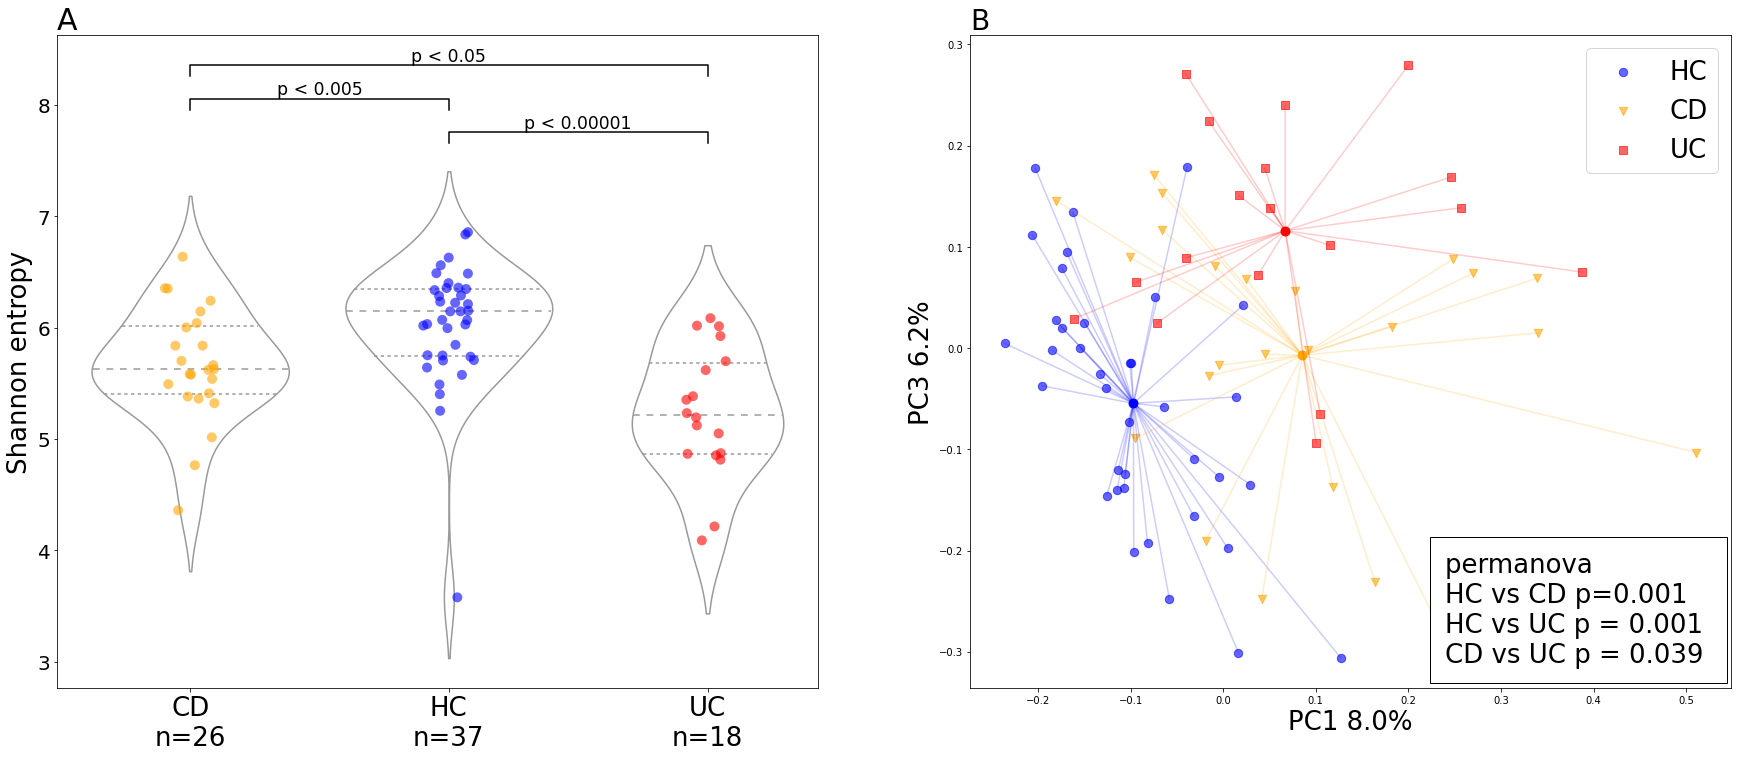

In [14]:
f1, (ax1,ax2) = plt.subplots(1,2, figsize=(30, 12))

## violinplots ##
sns.violinplot(ax=ax1, data=df1, x='Dg', y='Shannon_entropy', color='white', showfliers=False, inner='quartile',
              order=['CD',"HC","UC"])
sns.stripplot(ax=ax1, data=df1, x="Dg", y="Shannon_entropy", size=10, order=["CD","HC","UC"], 
              alpha=.6, palette=['orange','blue','red'])
ax1.set_ylabel('Shannon entropy', fontsize=26)
ax1.set_xlabel('')
ax1.tick_params(axis='both', labelsize=20)
ax1.set_xticklabels(["CD\nn=26","HC\nn=37","UC\nn=18"], fontsize=26)
ax1.set_title("A", fontsize=30, loc='left')


x1, x2 = 0, 2
y, h, col = df1['Shannon_entropy'].max() + 1.4, .1, 'k'
ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x1+x2)*.5, y+h, "p < 0.05", ha='center', va='bottom', color=col, fontsize='xx-large')

x1, x2 = 0, 1
y, h, col = df1['Shannon_entropy'].max() + 1.1, .1, 'k'
ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x1+x2)*.5, y+h, "p < 0.005", ha='center', va='bottom', color=col, fontsize='xx-large')

x1, x2 = 1, 2
y, h, col = df1['Shannon_entropy'].max() + 0.8, .1, 'k'
ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x1+x2)*.5, y+h, "p < 0.00001", ha='center', va='bottom', color=col, fontsize='xx-large')



## scatterplot ##
ax2.scatter(hc.PC1, hc.PC3, alpha = 0.6, c='blue', label='HC', s=70)
ax2.scatter(cd.PC1, cd.PC3, alpha = 0.6, c='orange', label='CD', s=70, marker='v')
ax2.scatter(uc.PC1, uc.PC3, alpha = 0.6, c='red', label='UC', s=70, marker='s')

# add centroids
ax2.scatter(centroid(tuples_hc)[0], centroid(tuples_hc)[1], color='blue', s=80)
ax2.scatter(centroid(tuples_cd)[0], centroid(tuples_cd)[1], color='orange', s=80)
ax2.scatter(centroid(tuples_uc)[0], centroid(tuples_uc)[1], color='red', s=80)

# plot centroid lines
for idx, val in hc.iterrows():
    x = [val.PC1, centroid(tuples_hc)[0],]
    y = [val.PC3, centroid(tuples_hc)[1]]
    ax2.plot(x, y, color='blue', alpha=0.2)

for idx, val in cd.iterrows():
    x = [val.PC1, centroid(tuples_cd)[0],]
    y = [val.PC3, centroid(tuples_cd)[1]]
    ax2.plot(x, y, color='orange', alpha=0.2)

for idx, val in uc.iterrows():
    x = [val.PC1, centroid(tuples_uc)[0],]
    y = [val.PC3, centroid(tuples_uc)[1]]
    ax2.plot(x, y, color='red', alpha=0.2)
    
# labels and legend
ax2.set_xlabel('PC1 8.0%', fontsize=26)
ax2.set_ylabel('PC3 6.2%', fontsize=26)
ax2.legend(loc=1, prop={'size': 26})
ax2.set_title("B", fontsize=28, loc='left')
ax2.text(0.24, -0.31, 'permanova \nHC vs CD p=0.001 \nHC vs UC p = 0.001 \nCD vs UC p = 0.039', bbox={'facecolor': 'white', 'pad': 15}, fontsize=26)


# save figure
f1.savefig('/Users/dagmarschierova/MEGA/MBÚ/TNF/NGS/runs_merged/outputs/qiime_results_B/diversity_Baseline_all/Baseline_violinplots_PCA-Dg.png')